In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'legend.frameon':True})


df = pd.read_csv('indeed-reg.csv') 
print(df.columns)
df.head()


Index(['Unnamed: 0', '_id', 'query', 'title', 'company', 'rating_mean',
       'location', 'salary', 'summary', 'sponso', 'contract', 'desc',
       'rating_count', 'day_since', 'salary_origin_mode', 'salary_min',
       'salary_max', 'salary_mean', 'date', 'query_developpeur',
       'query_business+intelligence', 'query_data+scientist',
       'query_data+analyst', 'contract_temps plein', 'contract_cdd',
       'contract_apprentissage', 'contract_indépendant', 'contract_stage',
       'contract_temps partiel', 'contract_intérim', 'contract_commission',
       'contract_contrat pro', 'contract_cdi', 'location_dirty', 'dep',
       'region'],
      dtype='object')


,Unnamed: 0,_id,query,title,company,rating_mean,location,salary,summary,sponso,...,contract_indépendant,contract_stage,contract_temps partiel,contract_intérim,contract_commission,contract_contrat pro,contract_cdi,location_dirty,dep,region
0,0,c5bc824b51725453,"[""data+scientist""]",Alternance - Data Scientist H/F,Malakoff Humanis,3.7,Paris 9e (75),NaN,Dans le cadre de votre alternance et en collab...,0,...,0,0,0,0,0,1,0,Paris 9e,75.0,Paris
1,1,41984177da7622eb,"[""data+analyst"",""data+scientist""]",DATA ANALYST H/F,Groupement Les Mousquetaires,3.0,Issy-les-Moulineaux (92),NaN,Vous accompagnez la montée en compétences anal...,0,...,0,0,0,0,0,0,1,Issy-les-Moulineaux,92.0,Paris
2,3,51c591314452c91c,"[""data+scientist"",""developpeur""]",DATA SCIENTIST / MACHINE LEARNING RESEARCHER I...,Joko,0.0,Paris (75),NaN,Tu seras responsable du développement d'algori...,1,...,0,1,0,0,0,0,0,Paris,75.0,Paris
3,4,1c8dce698e6095b3,"[""data+scientist""]",Data Scientist - Maintenance prédictive des ap...,MGEN,3.1,Tours (37),NaN,Description de l'établissement ou de la direct...,1,...,0,0,0,0,0,1,0,Tours,37.0,Ailleurs
4,5,aca60649d7115372,"[""data+scientist""]",Data Scientist (H/F),ACTIVUS Group,3.0,Paris (75),3 034 € - 3 709 € par mois,Pour renforcer nos pôles DataScience & Analyti...,1,...,0,0,0,0,0,0,1,Paris,75.0,Paris


### Organisation des salaires dans les régions

In [2]:
# suppression des colonnes inutiles
df0 = df[['salary_min', 'salary_max', 'salary_mean', 
          'date', 'region',
          'query_developpeur','query_business+intelligence', 'query_data+scientist','query_data+analyst', 
          'contract_temps plein', 'contract_cdd','contract_apprentissage', 'contract_indépendant', 'contract_stage', 
          'contract_temps partiel', 'contract_intérim', 'contract_commission', 'contract_contrat pro', 'contract_cdi']]

df0=df0[df0['salary_mean']>0] # suppression des lignes n'ayant pas un salaire
df0=df0[df0['region']!="Ailleurs"] # suppression des lignes n'éyant pas les départements recherchés

# mise en place de la valeur des salaires sur l'année
for i in df0.columns[:3]:
    df0[i]=12*df0[i]

print(df0.shape)
df0.head()

(359, 19)


,salary_min,salary_max,salary_mean,date,region,query_developpeur,query_business+intelligence,query_data+scientist,query_data+analyst,contract_temps plein,contract_cdd,contract_apprentissage,contract_indépendant,contract_stage,contract_temps partiel,contract_intérim,contract_commission,contract_contrat pro,contract_cdi
4,36408.0,44508.0,40458.0,2020-05-20,Paris,0,0,1,0,1,0,0,0,0,0,0,0,0,1
15,60000.0,60000.0,60000.0,2020-05-20,Bordeaux,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16,55000.0,65000.0,60000.0,2020-04-24,Paris,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17,60000.0,60000.0,60000.0,2020-05-08,Bordeaux,0,0,1,0,1,0,0,0,0,0,0,0,0,1
36,40000.0,70000.0,55000.0,2020-04-24,Paris,0,0,1,0,1,0,0,0,0,0,0,0,0,1


### Salaires suivant les régions et le domaine d'activité

" rq: le nombre de valeurs n'est pas apparent ici, utiliser sns.swarmplot(x='region',y='salary_mean', data=df0) "

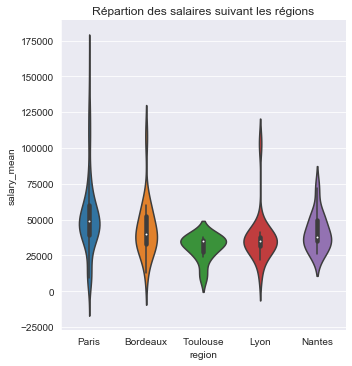

In [3]:
sns.catplot(x='region',y='salary_mean', kind="violin", split=True, data=df0).set(title = 'Répartion des salaires suivant les régions')
''' rq: le nombre de valeurs n'est pas apparent ici, utiliser sns.swarmplot(x='region',y='salary_mean', data=df0) '''

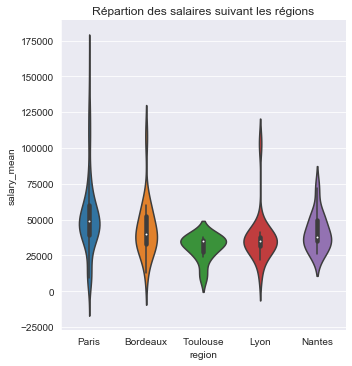

In [4]:
sns.catplot(x='region',y='salary_mean', kind="violin", split=True, data=df0).set(title = 'Répartion des salaires suivant les régions')

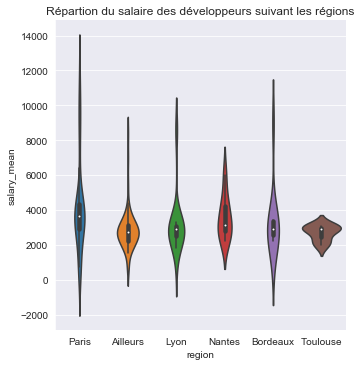

In [5]:
sns.catplot(x='region',y='salary_mean', kind="violin", split=True, data=df[df['query_developpeur']==1]).set(title = 'Répartion du salaire des développeurs suivant les régions')
#sns.swarmplot(x='region',y='salary_mean', data=df[df['query_developpeur']==1]).set(title = 'Répartion du salaire des développeurs suivant les régions')

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


[Text(0.5, 1.0, "Répartion du salaire concernant le business et l'intelligencesuivant les régions")]

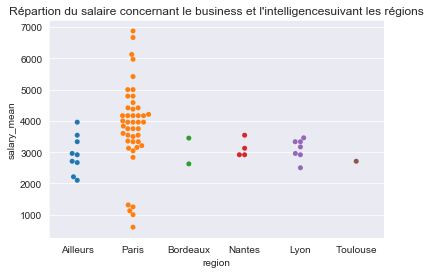

In [6]:
#sns.catplot(x='region',y='salary_mean', kind="violin", split=True, data=df[df['query_business+intelligence']==1]).set(title = 'Répartion du salaire concernant le business et l\'intelligencesuivant les régions')
sns.swarmplot(x='region',y='salary_mean', data=df[df['query_business+intelligence']==1]).set(title = 'Répartion du salaire concernant le business et l\'intelligence suivant les régions')

[Text(0.5, 1.0, 'Répartion du salaire des data-scientist suivant les régions')]

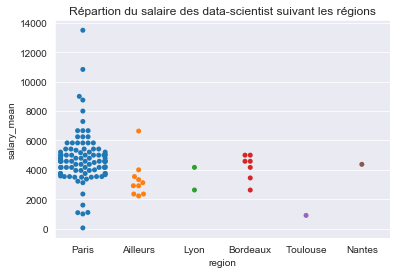

In [7]:
#sns.catplot(x='region',y='salary_mean', kind="violin", split=True, data=df[df['query_data+scientist']==1]).set(title = 'Répartion du salaire des data-scientist suivant les régions')
sns.swarmplot(x='region',y='salary_mean', data=df[df['query_data+scientist']==1]).set(title = 'Répartion du salaire des data-scientist suivant les régions')

[Text(0.5, 1.0, 'Répartion du salaire des data-analist suivant les régions')]

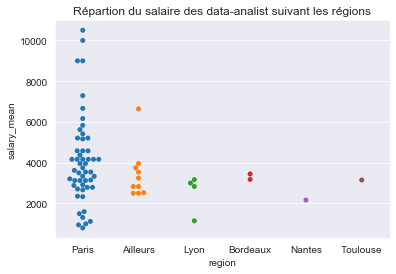

In [8]:
#sns.catplot(x='region',y='salary_mean', kind="violin", split=True, data=df[df['query_data+analyst']==1]).set(title = 'Répartion du salaire des data-analist suivant les régions')
sns.swarmplot(x='region',y='salary_mean', data=df[df['query_data+analyst']==1]).set(title = 'Répartion du salaire des data-analist suivant les régions')

### Salaire moyen des métiers suivant la région

In [9]:
#['query_developpeur','query_business+intelligence','query_data+scientist', 'query_data+analyst']:
pd.pivot_table(df0, values='salary_mean', index=['region'], columns=['query_developpeur'], aggfunc=np.mean)

query_developpeur,0,1
region,,
Bordeaux,48881.000000,39529.090909
Lyon,35445.166667,38313.666667
Nantes,38700.000000,42797.500000
Paris,52891.627976,50038.232456
Toulouse,27033.333333,32523.333333


### Répartition des emplois dans les différentes régions concernées

[Text(0.5, 1.0, 'Répartion des emplois suivant les régions')]

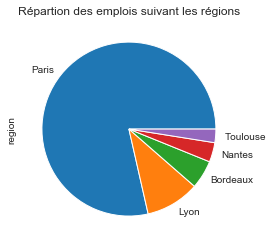

In [10]:
df0['region'].value_counts().plot(kind='pie').set(title = 'Répartion des emplois suivant les régions')

### Proportion et salaires des développeurs dans les différentes villes

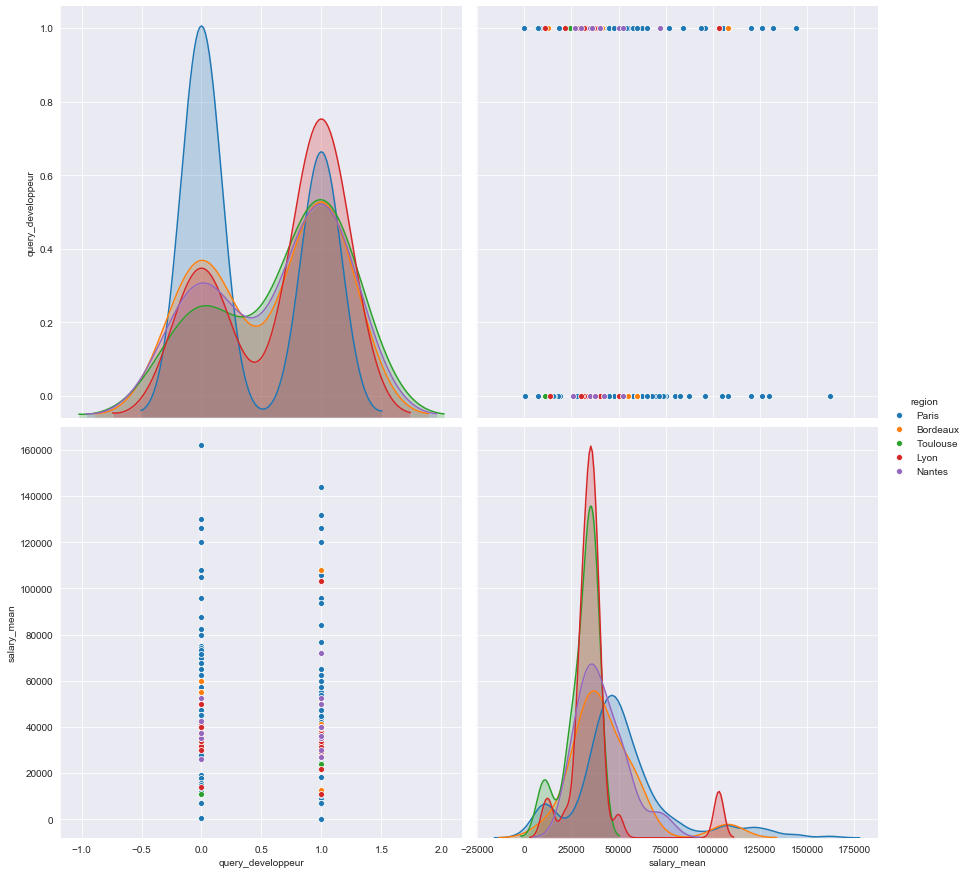

In [11]:
sns.pairplot(df0[["region",'query_developpeur','salary_mean']], height=6, hue="region")

### Salaires proposés suivant les demandes de métiers faites

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


" Acceptable si la colonne contient des possibilités disjointes, ce n'est pas le cas ici "

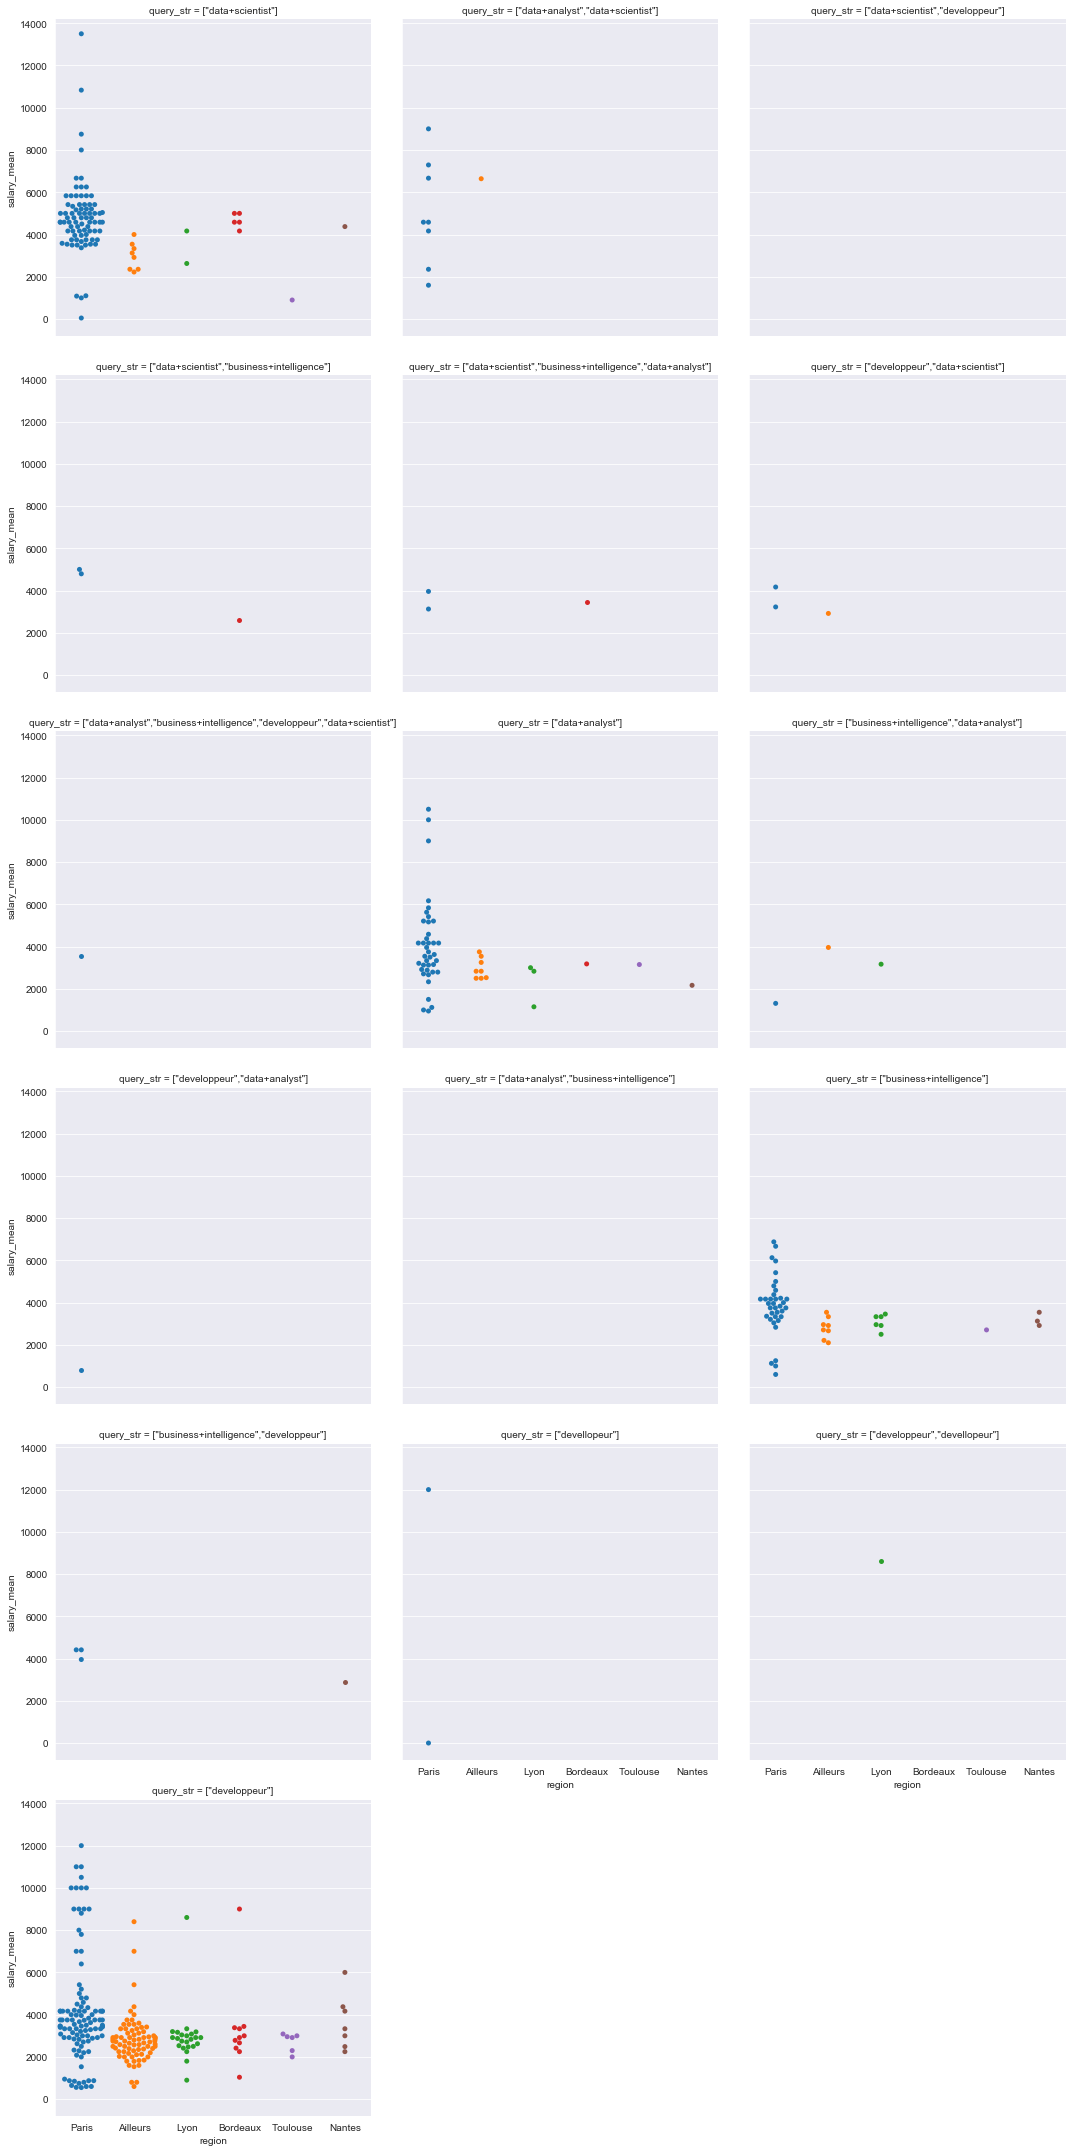

In [12]:
df['query_str']=df['query']              #[0,7,11,13]  
sns.catplot(x='region', y='salary_mean', data=df,  hue="region", col= 'query_str', col_wrap=3, kind='swarm')
''' Acceptable si la colonne contient des possibilités disjointes, ce n'est pas le cas ici '''

### Répartition dans les régions des salaires, métiers et leur type

In [14]:
df_group = df0.groupby(['region'],as_index=False).mean()
df_group.iloc[:,:4]

,region,salary_min,salary_max,salary_mean
0,Bordeaux,39652.105263,47281.368421,43466.736842
1,Lyon,34035.638889,40679.361111,37357.500000
2,Nantes,38712.923077,43730.153846,41221.538462
3,Paris,46725.524823,56750.730496,51738.127660
4,Toulouse,27841.888889,33544.777778,30693.333333


In [17]:
df_group.iloc[:,4:8]

,query_developpeur,query_business+intelligence,query_data+scientist,query_data+analyst
0,0.578947,0.105263,0.368421,0.105263
1,0.666667,0.194444,0.055556,0.111111
2,0.615385,0.307692,0.076923,0.076923
3,0.404255,0.159574,0.336879,0.184397
4,0.666667,0.111111,0.111111,0.111111


In [18]:
df_group.iloc[:,8:]

,contract_temps plein,contract_cdd,contract_apprentissage,contract_indépendant,contract_stage,contract_temps partiel,contract_intérim,contract_commission,contract_contrat pro,contract_cdi
0,0.842105,0.000000,0.052632,0.052632,0.000000,0.052632,0.052632,0.000000,0.000000,0.684211
1,0.666667,0.000000,0.027778,0.055556,0.027778,0.000000,0.000000,0.000000,0.000000,0.750000
2,0.538462,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.846154
3,0.457447,0.024823,0.014184,0.092199,0.085106,0.021277,0.024823,0.003546,0.010638,0.606383
4,0.777778,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.666667
